# Front MNIST

In [28]:
# imports
from importlib import reload

import os
import numpy as np

import matplotlib.pyplot as plt

import pandas
import seaborn as sns
import xarray as xr

# ulmo -- on f_s branch
from ulmo.llc import kinematics
from ulmo.llc import io as llc_io
from ulmo import io as ulmo_io
from ulmo.plotting import plotting 

from gsw import density

In [2]:
#%matplotlib ipympl

# Load LLC Table (for convenience)

In [3]:
llc_tfile = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Ulmo', 'Tables', 'LLC_uniform144_r0.5_nonoise.parquet')

In [4]:
llc_u = ulmo_io.load_main_table(llc_tfile)
llc_u.head()

Read main table: /media/xavier/crucial/Oceanography/OGCM/LLC/Ulmo/Tables/LLC_uniform144_r0.5_nonoise.parquet


,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,DT
0,56.752953,-170.447922,11465,10890,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56.796970,-155.677078,11469,11599,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.818966,-155.635422,11471,11601,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56.631676,-152.864578,11454,11734,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56.917801,-152.114578,11480,11770,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Load ds

In [17]:
ds = xr.open_dataset(os.path.join(os.getenv('OS_OGCM'), 'LLC', 'data', 'ThetaUVSalt', cutout.filename))

## Grab a cutout in Brazil-Malvanis

In [5]:
llc_u.lon.max()

179.76042

In [6]:
lat_BM = -42.
lon_BM = -50.
d = np.sqrt((llc_u.lat-lat_BM)**2 + (llc_u.lon-lon_BM)**2)
#

In [22]:
srt = np.argsort(d)
# Pick one
idx = srt[50]
# 
cutout = llc_u.iloc[idx].copy()
cutout

lat                                                        -41.811443
lon                                                        -49.572918
row                                                              5488
col                                                             16692
datetime                                          2011-11-13 00:00:00
filename            /data/Projects/Oceanography/data/LLC/ThetaUVSa...
pp_file             s3://llc/PreProc/LLC_uniform144_nonoise_prepro...
pp_root                                               llc_144_nonoise
field_size                                                         64
pp_idx                                                        2275399
pp_type                                                             0
mean_temperature                                            13.979824
Tmin                                                           10.827
Tmax                                                        16.655001
T90                 

In [23]:
cutout.filename = 'LLC4320_2011-09-30T00_00_00.nc'
cutout.filename

'LLC4320_2011-09-30T00_00_00.nc'

## Grab T,S

In [82]:
cutout.field_size = 64
xoffset = 100
yoffset = 350
#cutout.field_size = 500
#xoffset = 0
#yoffset = 0
row = cutout.row + yoffset
col = cutout.col + xoffset

In [83]:
Theta = ds.Theta[row:row+cutout.field_size, 
                col:col+cutout.field_size].values

In [84]:
Salt = ds.Salt[row:row+cutout.field_size, 
                col:col+cutout.field_size].values

# Front intensity

In [85]:
divb_2 = kinematics.calc_gradb(Theta, Salt)

In [86]:
ii = np.argmax(divb_2)
ii//500

6

## Plot

<Axes: >

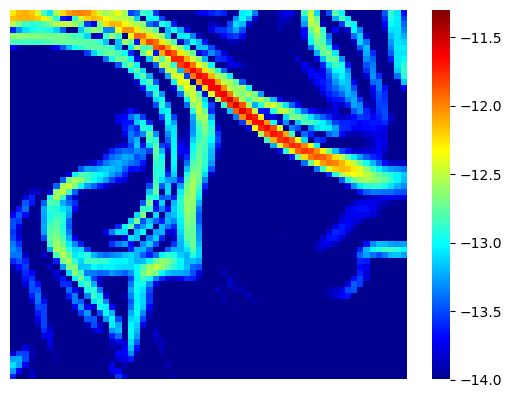

In [92]:
plotting.show_image(np.log10(divb_2), vmnx=(-14., -11.3))

<Axes: >

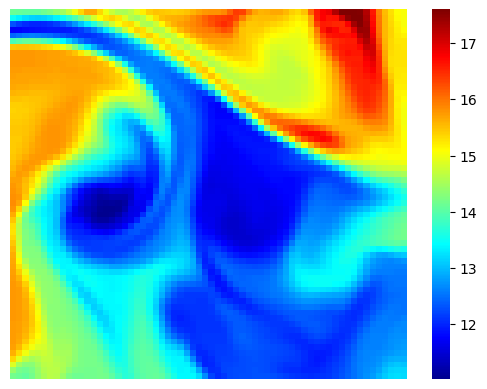

In [93]:
plotting.show_image(Theta)

<Axes: >

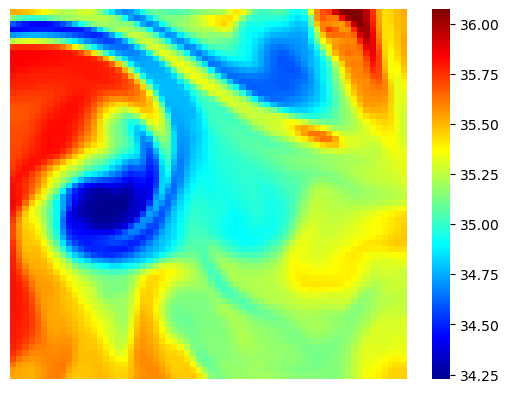

In [94]:
plotting.show_image(Salt)

----

In [29]:
rho = density.rho(Salt, Theta, np.zeros_like(Salt))

In [30]:
rho

array([[1026.47388533, 1026.46577767, 1026.44984166, ..., 1026.58379043,
        1026.5930896 , 1026.59635806],
       [1026.4714206 , 1026.45679864, 1026.4312677 , ..., 1026.59288672,
        1026.59890415, 1026.6006586 ],
       [1026.45602867, 1026.43230194, 1026.40570566, ..., 1026.60174436,
        1026.60442318, 1026.60297302],
       ...,
       [1026.37110506, 1026.37077684, 1026.35907003, ..., 1026.31190974,
        1026.30993296, 1026.29968728],
       [1026.37235209, 1026.37143219, 1026.3582314 , ..., 1026.31705655,
        1026.31822415, 1026.31166804],
       [1026.37375403, 1026.37087717, 1026.35912649, ..., 1026.32039697,
        1026.32218232, 1026.31963496]])

In [95]:
ds

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...